In [1]:
import geopandas as gpd

In [2]:
fp = 'MEX_adm/MEX_adm1.shp'

map_df = gpd.read_file(fp)

map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,145,MEX,Mexico,1,Aguascalientes,Estado,State,None,None,"POLYGON ((-102.12611 21.73960, -102.13392 21.7..."
1,145,MEX,Mexico,2,Baja California Sur,Estado,State,None,None,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568..."
2,145,MEX,Mexico,3,Baja California,Estado,State,None,None,"MULTIPOLYGON (((-114.23174 27.88559, -114.2308..."
3,145,MEX,Mexico,4,Campeche,Estado,State,None,None,"MULTIPOLYGON (((-91.79708 18.51764, -91.79708 ..."
4,145,MEX,Mexico,5,Chiapas,Estado,State,None,None,"MULTIPOLYGON (((-92.86236 15.16819, -92.86236 ..."


In [3]:
map_df.plot()

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [5]:
provincias_df = df.provincia.unique()
provincias_df

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

In [6]:
provincias_map_df = map_df.NAME_1.unique()
provincias_map_df

array(['Aguascalientes', 'Baja California Sur', 'Baja California',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

In [7]:
print('Provincias en data frame zona prop: '+str(len(provincias_df)))
print('Provincias en data frame mapa: '+str(len(provincias_map_df)))

Provincias en data frame zona prop: 33
Provincias en data frame mapa: 32


In [8]:
problemas = []
for item in provincias_map_df:
    isin = item in provincias_df
    print(item, isin)
    if not isin:
        problemas.append(item)

Aguascalientes True
Baja California Sur True
Baja California False
Campeche True
Chiapas True
Chihuahua True
Coahuila True
Colima True
Distrito Federal True
Durango True
Guanajuato True
Guerrero True
Hidalgo True
Jalisco True
México False
Michoacán True
Morelos True
Nayarit True
Nuevo León True
Oaxaca True
Puebla True
Querétaro True
Quintana Roo True
San Luis Potosí False
Sinaloa True
Sonora True
Tabasco True
Tamaulipas True
Tlaxcala True
Veracruz True
Yucatán True
Zacatecas True


In [9]:
problemas

['Baja California', 'México', 'San Luis Potosí']

In [10]:
for item in provincias_df:
    isin = item in provincias_map_df
    print(item, isin)
    if not isin:
        problemas.append(item)

Distrito Federal True
Jalisco True
Edo. de México False
Oaxaca True
Quintana Roo True
Colima True
San luis Potosí False
Nuevo León True
Querétaro True
Tamaulipas True
Puebla True
Yucatán True
Morelos True
Guerrero True
Tabasco True
Guanajuato True
Hidalgo True
Veracruz True
Chihuahua True
Aguascalientes True
Sonora True
Michoacán True
Baja California Norte False
Baja California Sur True
Coahuila True
Durango True
Sinaloa True
Chiapas True
Nayarit True
Tlaxcala True
Campeche True
Zacatecas True
nan False


In [11]:
problemas

['Baja California',
 'México',
 'San Luis Potosí',
 'Edo. de México',
 'San luis Potosí',
 'Baja California Norte',
 nan]

In [12]:
map_df.NAME_1 = map_df.NAME_1.replace({'Baja California': 'Baja California Norte', 'México': 'Edo. de México', 'San Luis Potosí':'San luis Potosí'})
map_df.NAME_1 

0            Aguascalientes
1       Baja California Sur
2     Baja California Norte
3                  Campeche
4                   Chiapas
5                 Chihuahua
6                  Coahuila
7                    Colima
8          Distrito Federal
9                   Durango
10               Guanajuato
11                 Guerrero
12                  Hidalgo
13                  Jalisco
14           Edo. de México
15                Michoacán
16                  Morelos
17                  Nayarit
18               Nuevo León
19                   Oaxaca
20                   Puebla
21                Querétaro
22             Quintana Roo
23          San luis Potosí
24                  Sinaloa
25                   Sonora
26                  Tabasco
27               Tamaulipas
28                 Tlaxcala
29                 Veracruz
30                  Yucatán
31                Zacatecas
Name: NAME_1, dtype: object

In [13]:
provinciaVScantidad = df.groupby('provincia').agg(cantidad_publicaciones = ('precio','count'))
cantidad_publis = map_df.set_index('NAME_1').join(provinciaVScantidad)
cantidad_publis.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,cantidad_publicaciones
NAME_1,,,,,,,,,,
Aguascalientes,145,MEX,Mexico,1,Estado,State,None,None,"POLYGON ((-102.12611 21.73960, -102.13392 21.7...",1753
Baja California Sur,145,MEX,Mexico,2,Estado,State,None,None,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568...",1700
Baja California Norte,145,MEX,Mexico,3,Estado,State,None,None,"MULTIPOLYGON (((-114.23174 27.88559, -114.2308...",3220
Campeche,145,MEX,Mexico,4,Estado,State,None,None,"MULTIPOLYGON (((-91.79708 18.51764, -91.79708 ...",263
Chiapas,145,MEX,Mexico,5,Estado,State,None,None,"MULTIPOLYGON (((-92.86236 15.16819, -92.86236 ...",1126


In [14]:
provinciaVScantidad.sort_values('cantidad_publicaciones', ascending=False).head(5)

,cantidad_publicaciones
provincia,
Distrito Federal,58790
Edo. de México,41607
Jalisco,21238
Querétaro,16988
Nuevo León,15324


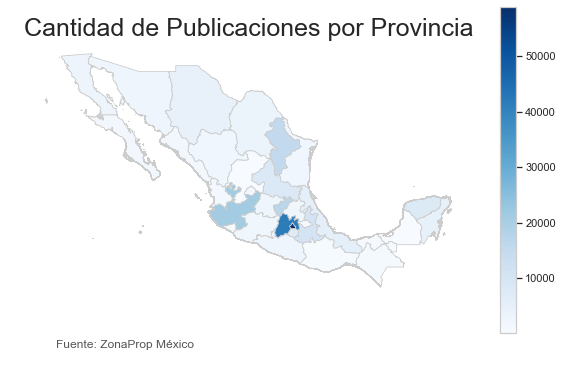

In [15]:
vmin, vmax = cantidad_publis.cantidad_publicaciones.min(), cantidad_publis.cantidad_publicaciones.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

cantidad_publis.plot(column='cantidad_publicaciones', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

ax.set_title('Cantidad de Publicaciones por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_cant_publicaciones_por_provincia.png', dpi=300)

In [16]:
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precioXmetro'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)
preciometroporprovincia = df.groupby('provincia').agg({'precioXmetro': 'mean'})
map_df_preciometro = map_df.set_index('NAME_1').join(preciometroporprovincia)


In [17]:
preciometroporprovincia.sort_values('precioXmetro', ascending=False).head(5)

,precioXmetro
provincia,
Distrito Federal,24011.411266
Guerrero,14678.291470
Edo. de México,14146.115299
Jalisco,13570.913738
Tabasco,13366.246230


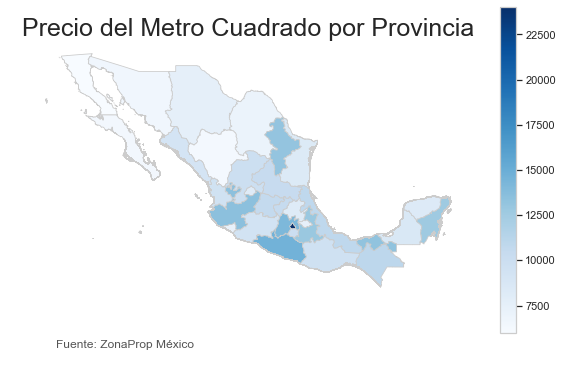

In [18]:
vmin, vmax = map_df_preciometro.precioXmetro.min(), map_df_preciometro.precioXmetro.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_preciometro.plot(column='precioXmetro', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Precio del Metro Cuadrado por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_preciodelm2_por_provincia.png', dpi=300)            

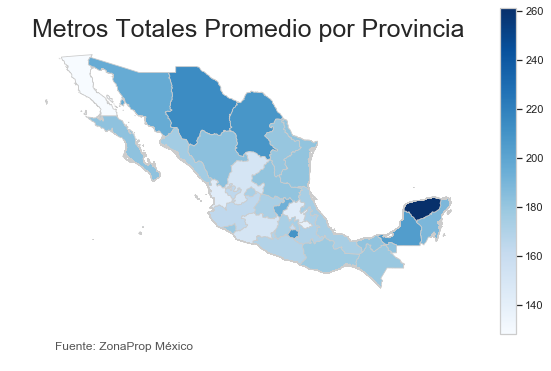

In [19]:
metrostotalesXprovincia= df.groupby('provincia').agg({'metrostotales':'mean'})
map_df_metros = map_df.set_index('NAME_1').join(metrostotalesXprovincia)

vmin, vmax = map_df_metros.metrostotales.min(), map_df_metros.metrostotales.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_metros.plot(column='metrostotales', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Metros Totales Promedio por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_metrostotalespromedio_por_provincia.png', dpi=300)  

In [20]:
metrostotalesXprovincia.sort_values('metrostotales', ascending=False).head(5)

,metrostotales
provincia,
Yucatán,261.063641
Chihuahua,213.807702
Morelos,209.622986
Coahuila,208.891884
Campeche,204.650655


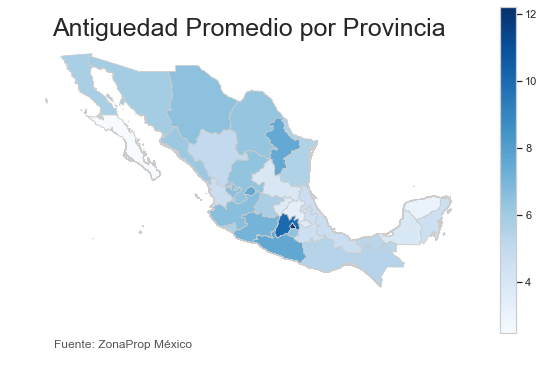

In [21]:
antiguedadpromedioXprovincia= df.groupby('provincia').agg({'antiguedad':'mean'})
map_df_antiguedad = map_df.set_index('NAME_1').join(antiguedadpromedioXprovincia)

vmin, vmax = map_df_antiguedad.antiguedad.min(), map_df_antiguedad.antiguedad.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_antiguedad.plot(column='antiguedad', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')


ax.set_title('Antiguedad Promedio por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_antiguedadpromedio_por_provincia.png', dpi=300)            

In [22]:
antiguedadpromedioXprovincia.sort_values('antiguedad', ascending=False).head(5)

,antiguedad
provincia,
Distrito Federal,12.189608
Edo. de México,10.027958
Guerrero,7.605657
Nuevo León,7.539231
Aguascalientes,7.524580


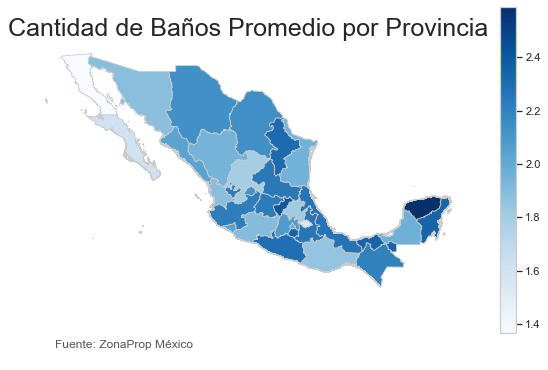

In [23]:
banospromedioXprovincia= df.groupby('provincia').agg({'banos':'mean'})
map_df_banos = map_df.set_index('NAME_1').join(banospromedioXprovincia)

variable = 'banos'

vmin, vmax = map_df_banos.banos.min(), map_df_banos.banos.max()

fig, ax = plt.subplots(1, figsize=(10, 6))


map_df_banos.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Cantidad de Baños Promedio por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_cant_banos_promedio_por_provincia.png', dpi=300)        

In [24]:
banospromedioXprovincia.sort_values('banos', ascending=False).head(5)

,banos
provincia,
Yucatán,2.588393
Querétaro,2.402109
Morelos,2.348330
Quintana Roo,2.343427
Tabasco,2.342072


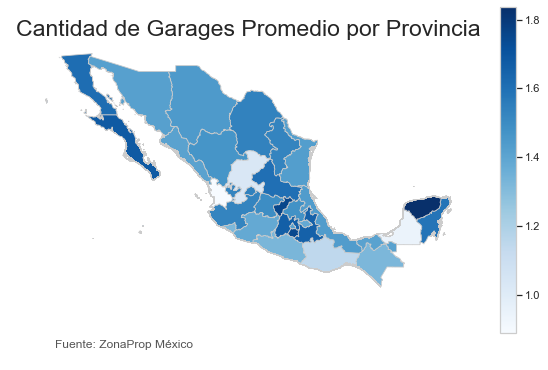

In [25]:
garagespromedioXprovincia= df.groupby('provincia').agg({'garages':'mean'})
map_df_garages = map_df.set_index('NAME_1').join(garagespromedioXprovincia)
variable = 'garages'
vmin, vmax = map_df_garages.garages.min(), map_df_garages.garages.max()
fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_garages.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Cantidad de Garages Promedio por Provincia', fontdict={'fontsize': '23', 'fontweight' : '3'})

ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_cant_garages_promedio_por_provincia.png', dpi=300)        

In [26]:
garagespromedioXprovincia.sort_values('garages', ascending=False).head(5)

,garages
provincia,
Yucatán,1.836322
Querétaro,1.755303
Morelos,1.749497
Baja California Sur,1.684280
Edo. de México,1.662463


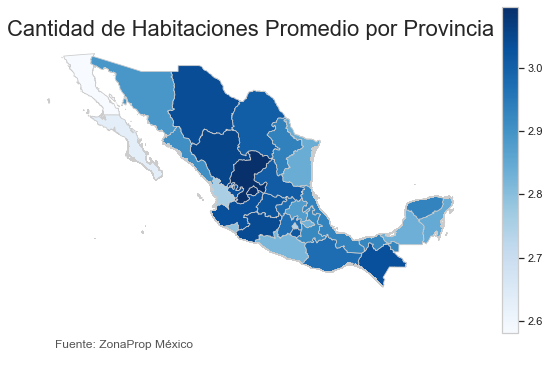

In [27]:
habitacionespromedioXprovincia= df.groupby('provincia').agg({'habitaciones':'mean'})
merged7 = map_df.set_index('NAME_1').join(habitacionespromedioXprovincia)


variable = 'habitaciones'

vmin, vmax = merged7.habitaciones.min(), merged7.habitaciones.max()

fig, ax = plt.subplots(1, figsize=(10, 6))


merged7.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


ax.axis('off')


ax.set_title('Cantidad de Habitaciones Promedio por Provincia', fontdict={'fontsize': '22', 'fontweight' : '3'})
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_cant_habitaciones_promedio_por_provincia.png', dpi=300)    

In [28]:
habitacionespromedioXprovincia.sort_values('habitaciones', ascending=False).head(5)

,habitaciones
provincia,
Aguascalientes,3.096447
Zacatecas,3.096386
Durango,3.053934
Michoacán,3.043149
Chihuahua,3.039927


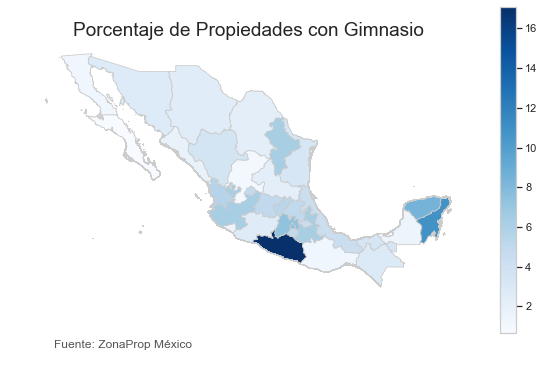

In [29]:
gimnasioXprovincia= df.groupby('provincia').agg({'gimnasio':'mean'})
gimnasioXprovincia['gimnasio'] = gimnasioXprovincia['gimnasio'].apply(lambda x: x*100)
gimnasioXprovincia = gimnasioXprovincia.rename(columns={'gimnasio':'porcentaje_propiedades_con_gimnasios'})
map_df_gimnasio = map_df.set_index('NAME_1').join(gimnasioXprovincia)

variable = 'porcentaje_propiedades_con_gimnasios'

vmin, vmax = map_df_gimnasio.porcentaje_propiedades_con_gimnasios.min(), map_df_gimnasio.porcentaje_propiedades_con_gimnasios.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_gimnasio.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Porcentaje de Propiedades con Gimnasio', fontdict={'fontsize': '19', 'fontweight' : '3'})

ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_porcentaje_props_con_gimnasio_por_provincia.png', dpi=300)        

In [30]:
gimnasioXprovincia.sort_values('porcentaje_propiedades_con_gimnasios', ascending=False).head(5)

,porcentaje_propiedades_con_gimnasios
provincia,
Guerrero,17.064974
Quintana Roo,10.891505
Yucatán,8.425832
Distrito Federal,7.501276
Edo. de México,7.368952


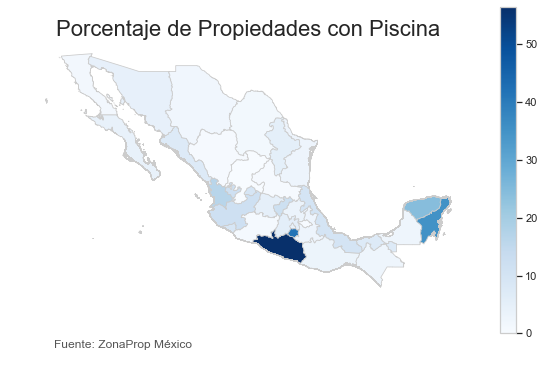

In [31]:
piscinaXprovincia = df.groupby('provincia').agg({'piscina':'mean'})
piscinaXprovincia['piscina'] = piscinaXprovincia['piscina'].apply(lambda x: x*100)
piscinaXprovincia = piscinaXprovincia.rename(columns={'piscina':'porcentaje_propiedades_con_piscinas'})
map_df_piscina = map_df.set_index('NAME_1').join(piscinaXprovincia)


variable = 'porcentaje_propiedades_con_piscinas'

vmin, vmax = map_df_piscina.porcentaje_propiedades_con_piscinas.min(), map_df_piscina.porcentaje_propiedades_con_piscinas.max()

fig, ax = plt.subplots(1, figsize=(10, 6))


map_df_piscina.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')


ax.set_title('Porcentaje de Propiedades con Piscina', fontdict={'fontsize': '22', 'fontweight' : '3'})

ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_porcentaje_props_con_piscina_por_provincia.png', dpi=300)        

In [32]:
piscinaXprovincia.sort_values('porcentaje_propiedades_con_piscinas', ascending=False).head(5)

,porcentaje_propiedades_con_piscinas
provincia,
Guerrero,56.422704
Morelos,41.788197
Quintana Roo,35.260723
Yucatán,24.255802
Nayarit,16.568047


In [34]:
df.usosmultiples.unique()

array([0., 1.])

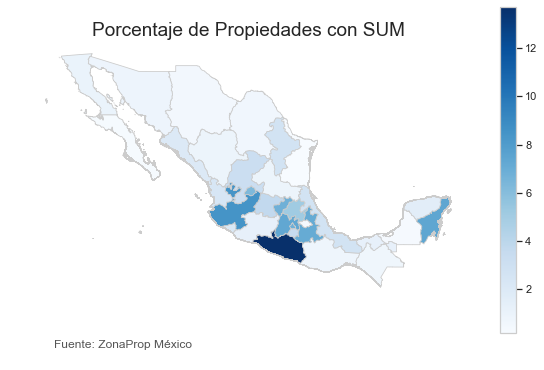

In [36]:
sumXprovincia= df.groupby('provincia').agg({'usosmultiples':'mean'})
sumXprovincia['usosmultiples'] = sumXprovincia['usosmultiples'].apply(lambda x: x*100)
sumXprovincia = sumXprovincia.rename(columns={'usosmultiples':'porcentaje_propiedades_con_sum'})
map_df_sum = map_df.set_index('NAME_1').join(sumXprovincia)

variable = 'porcentaje_propiedades_con_sum'

vmin, vmax = map_df_sum.porcentaje_propiedades_con_sum.min(), map_df_sum.porcentaje_propiedades_con_sum.max()

fig, ax = plt.subplots(1, figsize=(10, 6))

map_df_sum.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

ax.set_title('Porcentaje de Propiedades con SUM', fontdict={'fontsize': '19', 'fontweight' : '3'})

ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm)

fig.savefig('map_porcentaje_props_con_sum_por_provincia.png', dpi=300)        

In [37]:
sumXprovincia.sort_values('porcentaje_propiedades_con_sum', ascending=False).head(5)

,porcentaje_propiedades_con_sum
provincia,
Guerrero,13.704257
Jalisco,8.508334
Quintana Roo,7.464256
Edo. de México,7.354532
Puebla,7.120238


In [43]:
df[df['provincia'] == 'Guerrero'].piscina.mean()

0.5642270351008215

In [44]:
df[df['provincia'] == 'Morelos'].piscina.mean()

0.4178819681068557

In [45]:
df[df['provincia'] == 'Quintana Roo'].piscina.mean()

0.3526072329688814

In [46]:
df[df['provincia'] == 'Guerrero'].shape

(2678, 23)

In [48]:
df[df['provincia'] == 'Morelos'].shape

(7337, 23)

In [50]:
df[df['provincia'] == 'Quintana Roo'].shape

(4756, 23)

In [53]:
df[(df['provincia'] == 'Quintana Roo')&(df['piscina']==1)].shape

(1677, 23)